In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##INTERNET PRIVACY POLL

<p>
Internet privacy has gained widespread attention in recent years. To measure the degree to which people are concerned about hot-button issues like Internet privacy, social scientists conduct polls in which they interview a large number of people about the topic. In this assignment, we will analyze data from a July 2013 Pew Internet and American Life Project poll on Internet anonymity and privacy, which involved interviews across the United States. While the full polling data can be found <a href='http://pewinternet.org/Shared-Content/Data-Sets/2013/July-2013--Anonymity-(Omnibus).aspx'>here</a>, we will use a more limited version of the results, available in <a href='https://courses.edx.org/c4x/MITx/15.071x_2/asset/AnonymityPoll.csv'>AnonymityPoll.csv</a>. The dataset has the following fields (all Internet use-related fields were only collected from interviewees who either use the Internet or have a smartphone)
</p>

### Description about features

* <b>Internet.Use:</b> A binary variable indicating if the interviewee uses the Internet, at least occasionally (equals 1 if the interviewee uses the Internet, and equals 0 if the interviewee does not use the Internet).

* <b>Smartphone</b>: A binary variable indicating if the interviewee has a smartphone (equals 1 if they do have a smartphone, and equals 0 if they don't have a smartphone).

* <b>Sex</b>: Male or Female.

* <b>Age</b>: Age in years.

* <b>State</b>: State of residence of the interviewee.

* <b>Region</b>: Census region of the interviewee (Midwest, Northeast, South, or West).

* <b>Conservativeness</b>: Self-described level of conservativeness of interviewee, from 1 (very liberal) to 5 (very conservative).

* <b>Info.On.Internet</b>: Number of the following items this interviewee believes to be available on the Internet for others to see: (1) Their email address; (2) Their home address; (3) Their home phone number; (4) Their cell phone number; (5) The employer/company they work for; (6) Their political party or political affiliation; (7) Things they've written that have their name on it; (8) A photo of them; (9) A video of them; (10) Which groups or organizations they belong to; and (11) Their birth date.

* <b>Worry.About.Info</b>: A binary variable indicating if the interviewee worries about how much information is available about them on the Internet (equals 1 if they worry, and equals 0 if they don't worry).

* <b>Privacy.Importance</b>: A score from 0 (privacy is not too important) to 100 (privacy is very important), which combines the degree to which they find privacy important in the following: (1) The websites they browse; (2) Knowledge of the place they are located when they use the Internet; (3) The content and files they download; (4) The times of day they are online; (5) The applications or programs they use; (6) The searches they perform; (7) The content of their email; (8) The people they exchange email with; and (9) The content of their online chats or hangouts with others.

* <b>Anonymity.Possible</b>: A binary variable indicating if the interviewee thinks it's possible to use the Internet anonymously, meaning in such a way that online activities can't be traced back to them (equals 1 if he/she believes you can, and equals 0 if he/she believes you can't).

* <b>Tried.Masking.Identity</b>: A binary variable indicating if the interviewee has ever tried to mask his/her identity when using the Internet (equals 1 if he/she has tried to mask his/her identity, and equals 0 if he/she has not tried to mask his/her identity).

* <b>Privacy.Laws.Effective</b>: A binary variable indicating if the interviewee believes United States law provides reasonable privacy protection for Internet users (equals 1 if he/she believes it does, and equals 0 if he/she believes it doesn't).

In [2]:
# Load the dataset
AnonymityPoll = pd.read_csv('./data/AnonymityPoll.csv')

In [3]:
# Shape of the dataset
print AnonymityPoll.shape

(1002, 13)


<b>1002 people participated in this survey.</b>

In [5]:
# Info
AnonymityPoll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1002 entries, 0 to 1001
Data columns (total 13 columns):
Internet.Use              1001 non-null float64
Smartphone                959 non-null float64
Sex                       1002 non-null object
Age                       975 non-null float64
State                     1002 non-null object
Region                    1002 non-null object
Conservativeness          940 non-null float64
Info.On.Internet          792 non-null float64
Worry.About.Info          790 non-null float64
Privacy.Importance        787 non-null float64
Anonymity.Possible        753 non-null float64
Tried.Masking.Identity    784 non-null float64
Privacy.Laws.Effective    894 non-null float64
dtypes: float64(10), object(3)
memory usage: 97.9+ KB


<b>There are many features which have missing values e.g. Smartphone, Age etc.</b>

### Breakdown of the number of people with smartphones

In [7]:
AnonymityPoll.Smartphone.value_counts()

1    487
0    472
dtype: int64

<b>487 interviewees use a smartphone and 472 do not. We see that another 43 had missing values.</b>

In [10]:
# number of people with missing values for smartphone
print list(AnonymityPoll.Smartphone.isnull()).count(True)

43


#### Which of the following are states in the Midwest census region?

* Colorado
* Kansas
* Kentucky
* Missouri
* Ohio
* Pennsylvania

In [15]:
c = AnonymityPoll.groupby('Region')
c.get_group('Midwest').State.unique()

array(['Michigan', 'Ohio', 'Indiana', 'Minnesota', 'North Dakota',
       'Wisconsin', 'Missouri', 'Illinois', 'Nebraska', 'South Dakota',
       'Kansas', 'Iowa'], dtype=object)

####  Which was the state in the South census region with the largest number of interviewees?

In [19]:
c.get_group('South').groupby('State').size().order(ascending=False).head(1)

State
Texas    72
dtype: int64

<b>Texas is the state in the South region with the largest number of interviewees, 72.</b>

### Analysis of relationship smartphones and internet usage


In [24]:
AnonymityPoll.groupby(['Internet.Use', 'Smartphone']).size()

Internet.Use  Smartphone
0             0             186
              1              17
1             0             285
              1             470
dtype: int64

In [ ]:
# How many interviewees reported not having used the Internet and not having used a smartphone?
186

In [21]:
# How many interviewees reported having used the Internet and having used a smartphone?
470

470

In [22]:
# How many interviewees reported having used the Internet but not having used a smartphone?
285

305

In [23]:
# How many interviewees reported having used a smartphone but not having used the Internet?
17

17

### Analysis of missing values

In [25]:
# How many interviewees have a missing value for their Internet use?
AnonymityPoll['Internet.Use'].isnull().sum()

1

In [26]:
# How many interviewees have a missing value for their smartphone use?
AnonymityPoll.Smartphone.isnull().sum()

43

### Dataframe containing only those users who reported Internet use or who reported smartphone use.

In [27]:
limited = AnonymityPoll[(AnonymityPoll['Internet.Use'] == 1) | (AnonymityPoll['Smartphone'] == 1)]

In [28]:
# How many interviewees in this new dataset ?
print limited.shape[0]

792


In [29]:
# Now which of the variables have missing values
limited.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 792 entries, 0 to 1001
Data columns (total 13 columns):
Internet.Use              792 non-null float64
Smartphone                772 non-null float64
Sex                       792 non-null object
Age                       770 non-null float64
State                     792 non-null object
Region                    792 non-null object
Conservativeness          747 non-null float64
Info.On.Internet          792 non-null float64
Worry.About.Info          790 non-null float64
Privacy.Importance        787 non-null float64
Anonymity.Possible        753 non-null float64
Tried.Masking.Identity    784 non-null float64
Privacy.Laws.Effective    727 non-null float64
dtypes: float64(10), object(3)
memory usage: 77.3+ KB


In [31]:
# What is the average number of pieces of personal information on the Internet ?
AnonymityPoll['Info.On.Internet'].mean()

3.7954545454545454

<b>A person on average has about 4 pieces of information on the Internet.</b>

In [32]:
# How many interviewees reported a value of 0 for Info.On.Internet?
AnonymityPoll[AnonymityPoll['Info.On.Internet'] == 0].shape[0]

105

<b>There are about 105 people among those who use Internet with no information about themselves on the Internet.</b>

In [33]:
# How many interviewees reported the maximum value of 11 for Info.On.Internet?
AnonymityPoll[AnonymityPoll['Info.On.Internet'] == 11].shape[0]

8

<b>There are about 8 people among those who use Internet and have all of their information on the Internet.</b>

In [49]:
# What proportion of interviewees who answered the Worry.About.Info question 
# worry about how much information is available about them on the Internet?

c = limited['Worry.About.Info'].value_counts()
print c.ix[1] * 1. / (c.ix[0] + c.ix[1])

0.488607594937


<b>We see that 386 of interviewees worry about their info, and 404 do not. Therefore, there were 386+404=790 people who answered the question, and the proportion of them who worry about their info is 386/790=0.4886.</b>

In [50]:
# What proportion of interviewees who answered the Anonymity.Possible question 
# think it is possible to be completely anonymous on the Internet?

c = limited['Anonymity.Possible'].value_counts()
print c.ix[1] * 1. / (c.ix[0] + c.ix[1])

0.369189907039


<b>278 respondents said anonymity is possible and 475 said it is not. Therefore, the desired proportion is 278/(278+475)=0.3692.</b>

In [51]:
# What proportion of interviewees who answered the Tried.Masking.Identity question
# have tried masking their identity on the Internet?

c = limited['Tried.Masking.Identity'].value_counts()
print c.ix[1] * 1. / (c.ix[0] + c.ix[1])

0.163265306122


<b>The output tells us that of all the respondents who answered the Tried.Masking.Identity question, 128 out of (128+656) have tried masking their identity on the internet.</b>

In [52]:
# What proportion of interviewees who answered the Privacy.Laws.Effective question 
# find United States privacy laws effective?

c = limited['Privacy.Laws.Effective'].value_counts()
print c.ix[1] * 1. / (c.ix[0] + c.ix[1])

0.255845942228


<b>The output tells us that 186 out of (186+541) people who answered the Privacy.Laws.Effective question find US privacy laws effective.</b>

### Often, we are interested in whether certain characteristics of interviewees (e.g. their age or political opinions) affect their opinions on the topic of the poll (in this case, opinions on privacy). In this section, we will investigate the relationship between the characteristics Age and Smartphone and outcome variables Info.On.Internet and Tried.Masking.Identity, again using the limited data frame we built earlier.

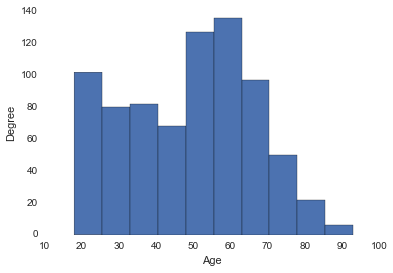

In [54]:
# Histogram of the age of employees
limited.Age.plot(kind='hist');
plt.xlabel('Age');

<b>People aged about 60 years old are best represented age group in the population.</b>

In [92]:
# What is the largest number of interviewees 
# that have exactly the same value in their Age 
# variable AND the same value in their Info.On.Internet variable?

c = limited.groupby(['Age', 'Info.On.Internet'])
c.size().max()

6

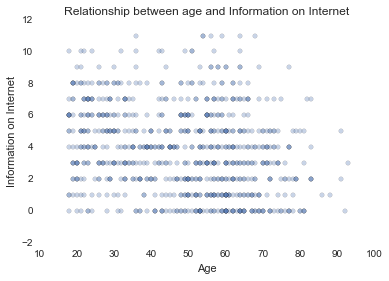

In [64]:
# lets analyze the relationship between age and info.on.internet variable
limited.plot('Age', 'Info.On.Internet', alpha=.3, kind='scatter');
plt.xlabel('Age');
plt.ylabel('Information on Internet');
plt.title('Relationship between age and Information on Internet');

#### For younger people aged 18-30, the average value of Info.On.Internet appears to be roughly 5, while most peopled aged 60 and older have a value less than 5. Therefore, older age appears to be associated with a smaller value of Info.On.Internet, but from the spread of dots on the image, it's clear the association is not particularly strong.

In [89]:
# Summary of Info.on.Internet value broken down by whether interviewee is a smartphone user or not
c = limited.groupby(['Smartphone'])
c.size()

Smartphone
0             285
1             487
dtype: int64

In [90]:
# What is the average Info.On.Internet value for smartphone users ?
c.aggregate(np.mean)['Info.On.Internet']

Smartphone
0             2.922807
1             4.367556
Name: Info.On.Internet, dtype: float64

In [91]:
# What proportion of smartphone users who answered the Tried.Masking.Identity question 
# have tried masking their identity when using the Internet?

c['Tried.Masking.Identity'].apply(lambda x: list(x).count(1) * 1. / x.shape[0])

Smartphone
0             0.115789
1             0.190965
Name: Tried.Masking.Identity, dtype: float64